## Notebook 8B  - Mon/Tues
### Gaussian/normal random variables, comparing measurements with uncertainty, 2D Random Walks
### Total points: 6
#### PHYS 225 Intro to Computational Physics, Fall 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gaussian (i.e., normal) distributed numbers 
Today we focus on random variables with a Gaussian distribution (also called a normal distribution). [Wikipedia has a great page](https://en.wikipedia.org/wiki/Normal_distribution), which includes this probability density function:  

$$f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$
A normal distribution is defined by two numbers: $\mu$, the mean value of the distribution, and $\sigma$, the standard deviation. 

# Task 1: Define the `normal_density` function, and create a plot.
1. Define a function `normal_density()` that expresses the probability distribution above.
    * **Inputs**: `x`, `mu`, `sigma`
    * **Outputs**: `p` (the probability density for those inputs)
1. Using your `normal_density` function, create a plot of the normal distribution. Choose at least 3 different pairs of mean and standard deviation values that show how changing $\mu$ and $\sigma$ change the distribution.

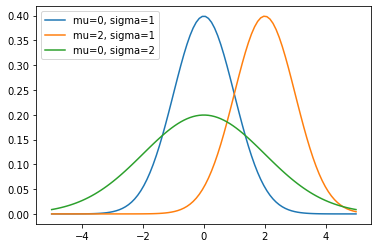

In [2]:
""" Define the normal_density() function and create a plot"""

### BEGIN SOLUTION
def normal_density(x,mu, sigma) :
    p = 1/(2*np.pi*sigma**2)**0.5 * np.exp(-(x-mu)**2 / (2 * sigma**2))
    return p

x = np.linspace(-5,5,100)

mu = 0; sigma = 1
y1 = normal_density(x,mu,sigma)
plt.plot(x, y1, label = "mu=" + str(mu) + ", sigma="+str(sigma))

mu = 2; sigma = 1
y1 = normal_density(x,mu,sigma)
plt.plot(x, y1, label = "mu=" + str(mu) + ", sigma="+str(sigma))

mu = 0; sigma = 2
y1 = normal_density(x,mu,sigma)
plt.plot(x, y1, label = "mu=" + str(mu) + ", sigma="+str(sigma))

plt.legend()

### END SOLUTION

In [3]:
""" Test cases for the density function """
dx = 0.01
x = np.arange(-4,4,dx)
y = normal_density(x, 0.3, 0.78)
I = np.sum(y)*dx
print(I)
assert abs(I-1) < 1e-4  # check normalization
m = np.sum(x*y)*dx
print(m)
assert abs(m - 0.3) < 0.001  # check mean position
s = ( np.sum((y*(x-m)**2))*dx )**0.5
print(s)
assert abs(s-0.78) < 1e-4 # check standard deviation


0.999998899586644
0.29999557703288793
0.7799894889499146


## Creating Gaussian/normal distributed numbers using `numpy.random`
It is a two step process:
1. Select a random bit generator. Typically we will use the default random number generator through `rng = np.random.default_rng()`. The object `rng` can then be used to create differnt types of random numbers.
1. Use a "generator" to create a particular distribution, such as Gaussian, using the random bits. To create a random value based on a Gaussian distribution, you would use `rng.normal(mu, sigma, shape)`.  To create random integers, use `rng.integers(low,high, shape)

You can read more about Numpy's approach to random number generation in the [documentation](https://numpy.org/doc/stable/reference/random/index.html).

In [10]:
""" every time you run this cell it produces a one random float that usually between -1 and 1 (about 2/3 of the time)  """
mu = 0 # mean/center of distribution
sigma = 1  # standard deviation (width) of distribution

rng = np.random.default_rng()  # use the default random number generator for bits

y = rng.normal(mu, sigma, 1)
print(y)

[-0.16972746]


In [11]:
""" every time you run this cell it produces a 100 floating point numbers, 
the majority of which lie between -sigma and +sigma. """
mu = 0
sigma = 1
y = rng.normal(mu,sigma,100)  
print(y)

[-1.1807388  -1.02544588 -0.2452049  -0.6353167   0.89487228  1.85830857
  1.06136331  1.33350856 -0.05360916  0.25968928  0.75013734  0.52845822
 -0.88564372  0.65675595  0.81266094  1.69029132  0.37093258  0.74084792
 -1.13070641  0.46042487  0.24063159 -0.01663688  0.98945823 -1.24336038
 -0.07882327 -0.59269577 -0.88279791 -0.21074158 -1.21344083 -1.29384113
 -0.51748469 -1.13014537 -1.21196383 -1.85626266 -1.5250512  -0.22769912
 -0.54901272  0.14938036  1.03523356  0.23723702 -0.78113802 -0.79626439
 -0.29264716  1.22265873 -1.84292872  1.58618478 -0.39841748  1.361209
  0.58867859 -0.1143707   1.32535944 -1.7050626   0.38121264  0.04268243
 -0.61314332  1.2903601   0.79050705 -0.64636995  0.2533359   2.0641057
 -0.63398901 -0.57637252  0.56169774  0.40244505  0.01274097 -0.96707784
  1.49505317  0.39003422  0.83272195 -2.17188511 -0.3222746   0.50767973
 -0.39434645  1.59012879  0.38758031  1.05801231  1.198925   -0.20042095
 -0.09508377 -0.36554196 -0.56322192 -0.37420957  2.13

## Histogram plots and counting occurances within a range 

Because a normal distribution produces a continuous range of random values, we cannot count how many times an exact number occurs. However, we can count how many occur in a particular range. 

The plotting function `plt.hist` divides the range into a series of bins and counts the number of occurances within each bin. Read the [official matplotlib documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) for more details on `hist()`.  The function input `density=True` will scale the y-axis on the histogram so the area under the curve is 1.

counts =  [ 3. 13. 17. 11. 23. 16.  6.  4.  2.  5.]
bins =  [-1.83174939 -1.36580914 -0.89986889 -0.43392863  0.03201162  0.49795187
  0.96389212  1.42983238  1.89577263  2.36171288  2.82765313]
patches =  <BarContainer object of 10 artists>


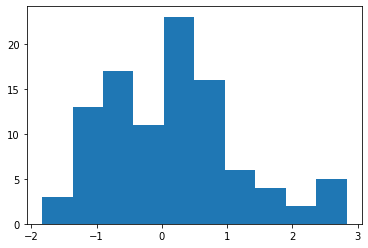

In [12]:
""" Example using the plt.hist() function """

mu = 0  # the mean value
sigma = 1  # standard devation
y = rng.normal(mu,sigma,100)  


counts, bins, patches = plt.hist(y)
print("counts = ", counts)  # the counts in each bin
print("bins = ", bins)  # the edges of each bin region
print("patches = ", patches)  

# Task 2: Compare theoretical gaussian distribution with histogram
![Histogram and theoretical Gaussian distribution](Gaussian_histogram.png)
To answer these questions, you will need to modify the example above and also look at the documentation for the `pyplot.hist()` function.
1. Adjust the number of randomly generated values to create a smoother distribution
1. Normalize the histogram so the histogram bars are the normalized to have a total area of 1, similar to a probability density. See the [official documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) for `plt.hist()`for a discussion of the `density` input.
1. Adjust the number of bins to create a smoother distribution.
1. Plot the theoretical Gaussian distribution from the `normal_density` function against the histogram.

Text(0, 0.5, 'Probability density')

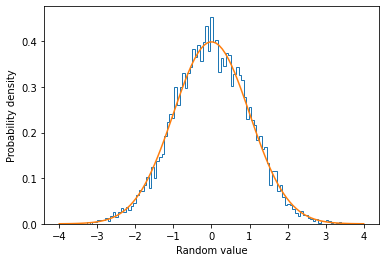

In [14]:
""" Generate a smoother distribution and compare with theoretical normal distribution """

### BEGIN SOLUTION
mu = 0
sigma = 1
y = rng.normal(mu,sigma,10000)  

# create the theoretical plot
x = np.linspace(-4,4,100)
y_density = normal_density(x,mu,sigma)

# Create the histogram
plt.figure()

counts, bins, patches = plt.hist(y, density=True, bins=100, histtype="step", label = "N = 10000, 100 bins")
plt.plot(x,y_density, label="Gaussian, $\mu=0$, $\sigma=1$")
#plt.legend()
plt.xlabel("Random value")
plt.ylabel("Probability density")
#plt.savefig("Gaussian_histogram.png")

### END SOLUTION


In [9]:
""" Check your plot with your instructor """
assert True

# Task 3: Visualize a histogram of values from another distribution
1. Pick one of the other random distributions from `numpy.random` that are listed on this page of [numpy.random distributions](https://numpy.org/doc/stable/reference/random/generator.html#distributions). 
1. Create a histogram showing the behavior of the random variable for a few values of the parameter (you may want to check Wikipedia or Google to see what reasonable parameter values are).

As an example, I plotted the **F distribution**. You should not pick `normal` or `f` distributions.
![F distribution histograms](F_distribution.png)

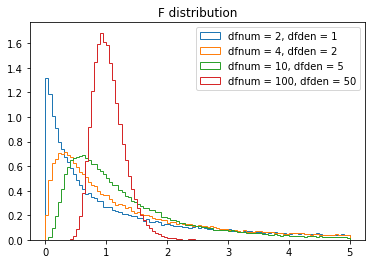

In [15]:
""" Visualize a different random distribution from the numpy.random distributions """

dfnum = 2; dfden = 1
y = rng.f(dfnum,dfden,100000)  
plotlabel = "dfnum = " +  str(dfnum) + ", dfden = " + str(dfden)
counts, bins, patches = plt.hist(y, density=True, bins=100, histtype="step", label = plotlabel, range=(0,5))

dfnum = 4; dfden = 2
y = rng.f(dfnum,dfden,100000)  
plotlabel = "dfnum = " +  str(dfnum) + ", dfden = " + str(dfden)
counts, bins, patches = plt.hist(y, density=True, bins=100, histtype="step", label = plotlabel, range=(0,5))

dfnum = 10; dfden = 5
y = rng.f(dfnum,dfden,100000)  
plotlabel = "dfnum = " +  str(dfnum) + ", dfden = " + str(dfden)
counts, bins, patches = plt.hist(y, density=True, bins=100, histtype="step", label = plotlabel, range=(0,5))

dfnum = 100; dfden = 50
y = rng.f(dfnum,dfden,100000)  
plotlabel = "dfnum = " +  str(dfnum) + ", dfden = " + str(dfden)
counts, bins, patches = plt.hist(y, density=True, bins=100, histtype="step", label = plotlabel, range=(0,5))
plt.title( "F distribution")
plt.legend()
#plt.savefig("F_distribution.png")


In [11]:
""" Plot a different distribution 
    Show your instructor your plot before submitting """
assert True

# Task 4: Probability density for the sum of two random normal/Gaussian variables
Consider two random Gaussian variables, $X_1$ with $\mu_1 = 0$ and $\sigma_1 = 2$ and $X_2$ with $\mu_2 = 6$ and $\sigma_2 = 1$. The plots of the two individual distributions looks like:

![Probability densities of two Gaussian random variables before summing](Two_Gaussian_Variables_Before_Sum.png)

1. Sketch on a piece of paper the two indiviudal distributions (on a single set of axes) and predict the distribution for the sum.
1. Compututationally model the sum of two random normal variables with parameters as specified above. 
1. Plot the histogram for the new variable $X_3 = X_1 + X_2$
    * Show the original two distributions along with the distribution of $X_3$
    * Add a legend to the plot labeled each curve.
1. Explain the resulting histogram for $X_3$. Is it what you expected?

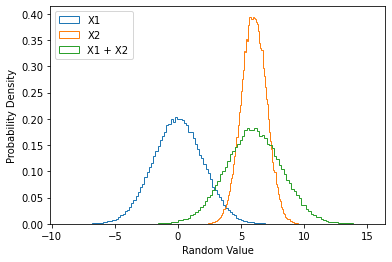

In [16]:
""" Histogram of sum of two Gaussian Variables """
### BEGIN SOLUTION
mu = 0
sigma = 2
y1 = rng.normal(mu,sigma,100000)  

mu = 6
sigma = 1
y2 = rng.normal(mu,sigma,100000)  

y3 = y1 + y2

plt.figure()
counts, bins, patches = plt.hist(y1, density=True, bins=100, histtype="step", label = "X1")
counts, bins, patches = plt.hist(y2, density=True, bins=100, histtype="step", label = "X2")
counts, bins, patches = plt.hist(y3, density=True, bins=100, histtype="step", label = "X1 + X2")
plt.xlabel("Random Value")
plt.ylabel("Probability Density")
plt.legend()
#plt.savefig("Two_Gaussian_Variables_Before_Sum.png")
### END SOLUTION

In [13]:
""" Distribution of two random variables. 
    Talk to your instructor before submitting. """
assert True

## 2D random numpy arrays
You can make 2D random arrays for the other distributions such as `np.random.normal` by specifying the shape of the array `(nRows, nCols)`.

In [14]:
np.random.normal(0,1,(5,4))

array([[ 0.64428303,  1.68422463, -0.28746895,  0.78543824],
       [-0.40074665, -0.68825521,  0.86737138,  0.05614957],
       [-0.02069837,  0.6318524 , -0.40933918,  0.72771356],
       [-1.38723731,  1.86869322,  0.19127189,  0.77349624],
       [ 1.00278209,  0.02672486,  2.04015009,  0.90094294]])

# Task 5: Modeling a variation in the sample mean and sample standard deviation
Often in science lab classes you will take repeated measurements in order to get a more precise estimate of a quantity. The mean (average) of the measurements should provide a better estimate that just a single measurement. However, the mean value still has uncertainty.  
 
1. Assume you take 10 measurements per trial. 
1. Use mean value $\mu = 0$ and standard deviation $\sigma = 1$ for the random variable.
1. Use a single 2D random array named `X` to generate the 10 measurements for $N_{\textrm{trials}}$ trials. You can pick the value of $N_\textrm{trials}$.
1. Calculate the mean value for each trial and store in an array `xmean`. Create a histogram of the sample mean values across many trials. 
1. Make sure that the histogram looks smooth enough to clearly see the distribution. Pick $N_\textrm{trials}$ and the number of bins as appropriate.
1. Label your axes!

![Example distribution of means](Distribution_of_means.png)

Text(0, 0.5, 'Fraction of occurances')

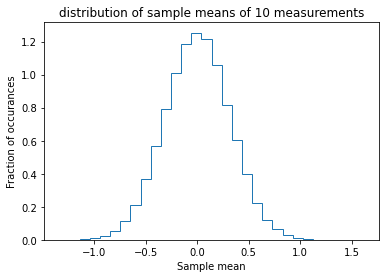

In [17]:
""" Comparing two measurements """
### BEGIN SOLUTION

plt.figure()
X = rng.normal(loc=0,scale=1,size=(100000,10))
xmean = X.mean(axis=1)
plt.hist(xmean, bins=30, histtype="step", density=True);

plt.title("distribution of sample means of 10 measurements")
plt.xlabel("Sample mean")
plt.ylabel("Fraction of occurances")
#plt.savefig("Distribution_of_means.png")

### END SOLUTION


In [16]:
""" Test cases for histograms """
assert np.any(np.array(X.shape)==10)   # check for 10 trials
ntrials = np.max(X.shape)
assert ntrials > 1000  # check for a bunch of trials
assert len(xmean) == ntrials
assert abs(X.mean()) < 4/(ntrials)**0.5
print(ntrials)

100000


# Task 6: Interpretting the histogram of sample means
For a Gaussian random variable with mean $\mu$ and standard deviation $\sigma$, it can be shown that the mean value of $N$ measurements will have a distribution of values, which also has the same mean $\mu$, but the uncertainty in the mean is smaller
$$\sigma_{\textrm{mean}} = \frac{\sigma}{\sqrt{N}}$$
1. Compare your the histogram with a theoretical plot using your `normal_density` function with mean $\mu$, but with a smaller standard deviation given by $\sigma/\sqrt{N}$.  

**This demonstrates the *big idea* that the mean value of $N$ repeated measurements has the uncertainty reduced by a factor $\sqrt{N}$ as compared to a single measurement.**  


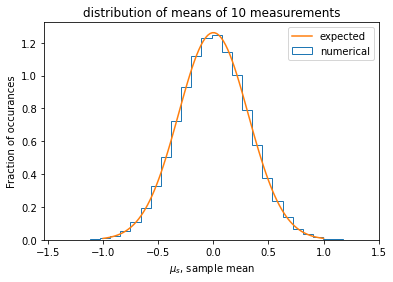

In [18]:
""" Comparing the histograms of means to a theoretical distribution """
### BEGIN SOLUTION

X = rng.normal(loc=0,scale=1,size=(100000,10))
xmean = X.mean(axis=1)

plt.figure()
plt.hist(xmean, bins=30, histtype="step", density=True, label = "numerical");

x = np.linspace(-1,1,100)
y = normal_density(x,0,1/(10)**0.5)
plt.plot(x,y, label="expected")
plt.xlabel("$\mu_s$, sample mean")
plt.ylabel("Fraction of occurances")
plt.title("distribution of means of 10 measurements")
plt.legend()

### END SOLUTION


In [18]:
""" Test cases for interpretting the graph. Show your plot to an instructor. """
assert True

# Task 7 (bonus, ungraded): Modeling a variation in the sample standard deviation
 
Re-use the calculation done in Task 5, but calculate the standard deviation for each trial. Because the "data" in each trial are different, there will be variation in the standard deviation calculated for that sample. 

1. Calculate the sample standard deviation value for each trial and store in an array `xstd`.Create a histogram of the sample standard deviations. 
1. Plot a histogram of the values in `xstd`. Make sure that the histograms look smooth enough to clearly see the distribution. Pick $N_\textrm{trials}$ and the number of bins as appropriate.
1. Label your axes!

![Example distribution of standard deviations](Distribution_of_std_dev.png)

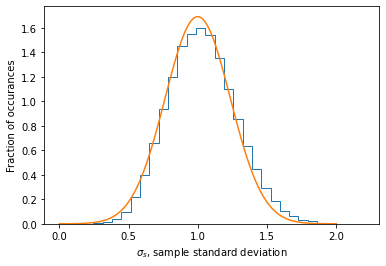

In [19]:
""" Comparing the histograms of std devations to a theoretical distribution """
### BEGIN SOLUTION

X = rng.normal(loc=0,scale=1,size=(100000,10))
xmean = X.mean(axis=1)


plt.figure()
xstd = X.std(axis=1, ddof=2)
plt.hist(xstd, bins=30, histtype="step", density=True);
plt.xlabel("$\sigma_s$, sample standard deviation")
plt.ylabel("Fraction of occurances")

#model of the sample standard deivation
x = np.linspace(0,2,100)
y = normal_density(x,1,1/(2*10-2)**0.5)
plt.plot(x,y)


### END SOLUTION

# Discussion of the sample standard deviation

In the histogram of sample standard deviations from the previous task, what standard deviation is most common?  Is the distribution centered at $\sigma = 1$?

Your distribution might be centered closer to $\sigma \approx 0.9$. However, there is a good reason, which has to do with how the `numpy.std()` function was written. 

For $N$ repeated measurements, the sample standard deviation should be calculated using
$$\sigma_s = \sqrt{\frac{\sum^N_{i=1}(x_i - \bar{x})^2}{N-1}}$$

However, the [numpy `std` function](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.std.html) uses a different denominator
$$\sigma_s = \sqrt{\frac{\sum^N_{i=1}(x_i - \bar{x})^2}{N-\textrm{ddof}}}$$

where `ddof` is the "degrees of freedom" input on the `numpy.std` function. By default `ddof=0`. 

You can partially correct your histogram of standard deviations using `ddof = 1` and show that the histogram of standard deviations is more closely centered about $\sigma=1$, as would be expected for a Gaussian random variable with standard deviation $\sigma=1$.

**Big idea: For a finite sample of data, all estimated parameters, such as mean and standard deviation will have some variation. However, that variability can be predicted based on the distribution (in this case, normal distribution).**

# Task 8:  Bonus task (ungraded): Generate and visualize random walks using numpy functions

![Random walk of 5 particles](Random_walk.png)
![Dispersing cloud of particles undergoing random walks](Dispersing_cloud.png)
1. Start with the code from PS9A for Random walks of 100 particles.
1. Use the `numpy.random.normal()` function to generate the steps.
1. The random motions in $X$ and $Y$ are uncorrelated so you can generate an array of random moves (and random walks) for the $X$ motion, and a second array of random moves (and random walks) for the $Y$ motion. 
1. You can plot single particle trajectories over time (in 2D) using `plt.plot`.
1. You can also plot the whole cloud at a particular moment in time (in 2D) using `plt.plot`.

Text(0.5, 0.98, 'Diffusing cloud of particles undergoing 2D random walks')

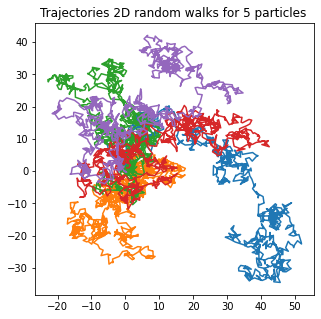

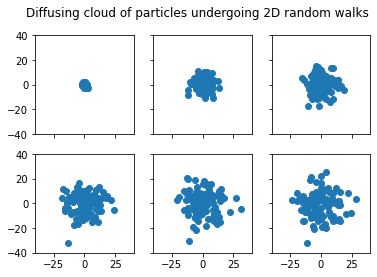

In [20]:
""" Calculate 100 objects going on random walks with 1000 steps"""

### BEGIN SOLUTION
x = rng.normal(0,1,(1000,100))
y = rng.normal(0,1,(1000,100))
walkx = x.cumsum(axis=0)
walky = y.cumsum(axis=0)

plt.figure(figsize=(5,5))
#plt.plot(walk)
for i in range(0,5) :
    plt.plot(walkx[:,i], walky[:,i]);
plt.title("Trajectories 2D random walks for 5 particles ")

#plt.savefig("Random_walk.png")

#plt.figure()
fig, axes = plt.subplots(2, 3, sharex='all', sharey='all')

nrows, ncols = axes.shape
step = 20
for i in range(0,nrows) :
    for j in range(0,ncols) :
        cur_step = i*ncols*step + j*step
        axes[i,j].plot(walkx[cur_step,:], walky[cur_step, :], "o", label = "Steps = " + str(cur_step))
        axes[i,j].set_xlim(-40,40)
        axes[i,j].set_ylim(-40,40)
    #plt.figure(figsize=(5,5))
plt.suptitle("Diffusing cloud of particles undergoing 2D random walks")
    
    
#plt.savefig("Dispersing_cloud.png")
    
### END SOLUTION